In [1]:
#1. Loading and Preprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler



In [2]:
# Load the dataset
file_path = 'CarPrice_Assignment.csv' 
car_data = pd.read_csv(file_path)

# Display basic information and summary
print(car_data.info())
print(car_data.describe())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
# Check for missing values
missing_values = car_data.isnull().sum()
print("Missing values:\n", missing_values)


Missing values:
 car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


In [13]:
#Check for Duplicates
# Check for duplicate rows
duplicates = car_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")


Number of duplicate rows: 0


In [15]:
#Outlier Detection and Handling
# Select numerical columns
numerical_columns = car_data.select_dtypes(include=[np.number]).columns

# Handle outliers using the IQR method
for column in numerical_columns:
    Q1 = car_data[column].quantile(0.25)
    Q3 = car_data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    car_data[column] = np.where(car_data[column] < lower_bound, lower_bound, car_data[column])
    car_data[column] = np.where(car_data[column] > upper_bound, upper_bound, car_data[column])


In [17]:
#Handle Skewness
# Check for skewness in numerical columns
from scipy.stats import skew

skewed_columns = car_data[numerical_columns].apply(lambda x: skew(x.dropna())).sort_values(ascending=False)
print("Skewed columns:\n", skewed_columns)

# Apply log transformation to reduce skewness
for column in skewed_columns.index:
    if skewed_columns[column] > 0.5:  # Threshold for positive skewness
        car_data[column] = np.log1p(car_data[column])  # log1p for log(1 + x)


Skewed columns:
 price               1.213071
wheelbase           0.918135
enginesize          0.901793
horsepower          0.808981
carwidth            0.770586
curbweight          0.676402
citympg             0.600161
highwaympg          0.344894
symboling           0.209525
carlength           0.154810
carheight           0.062660
peakrpm             0.049569
compressionratio    0.034891
boreratio           0.020009
car_ID              0.000000
stroke             -0.376351
dtype: float64


In [19]:
# Save the cleaned dataset
car_data.to_csv('Cleaned_CarPrice_Assignment.csv', index=False)


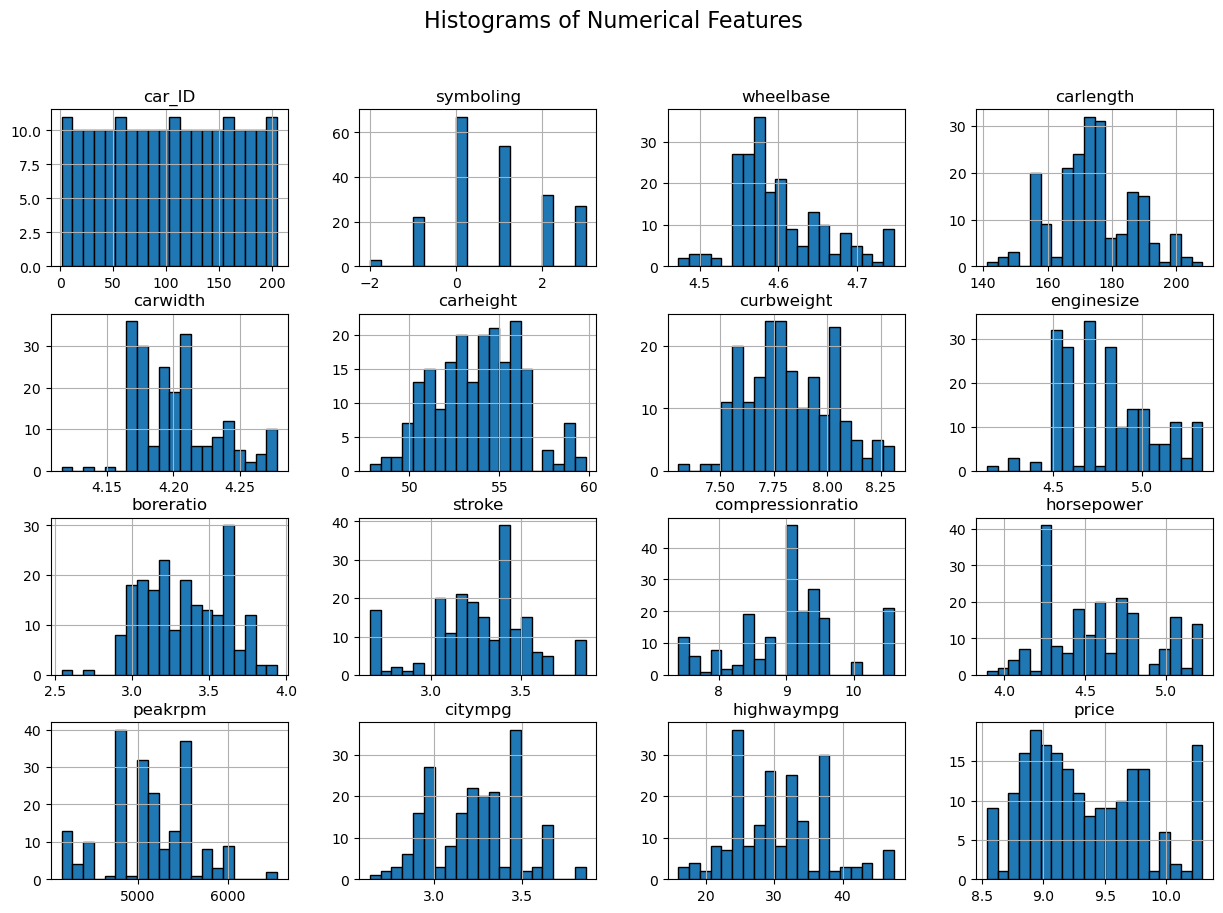

In [21]:
#Exploratory Data Analysis (EDA)
# Plot histograms for all numerical columns
car_data.hist(bins=20, figsize=(15, 10), edgecolor='black')
plt.suptitle('Histograms of Numerical Features', fontsize=16)
plt.show()


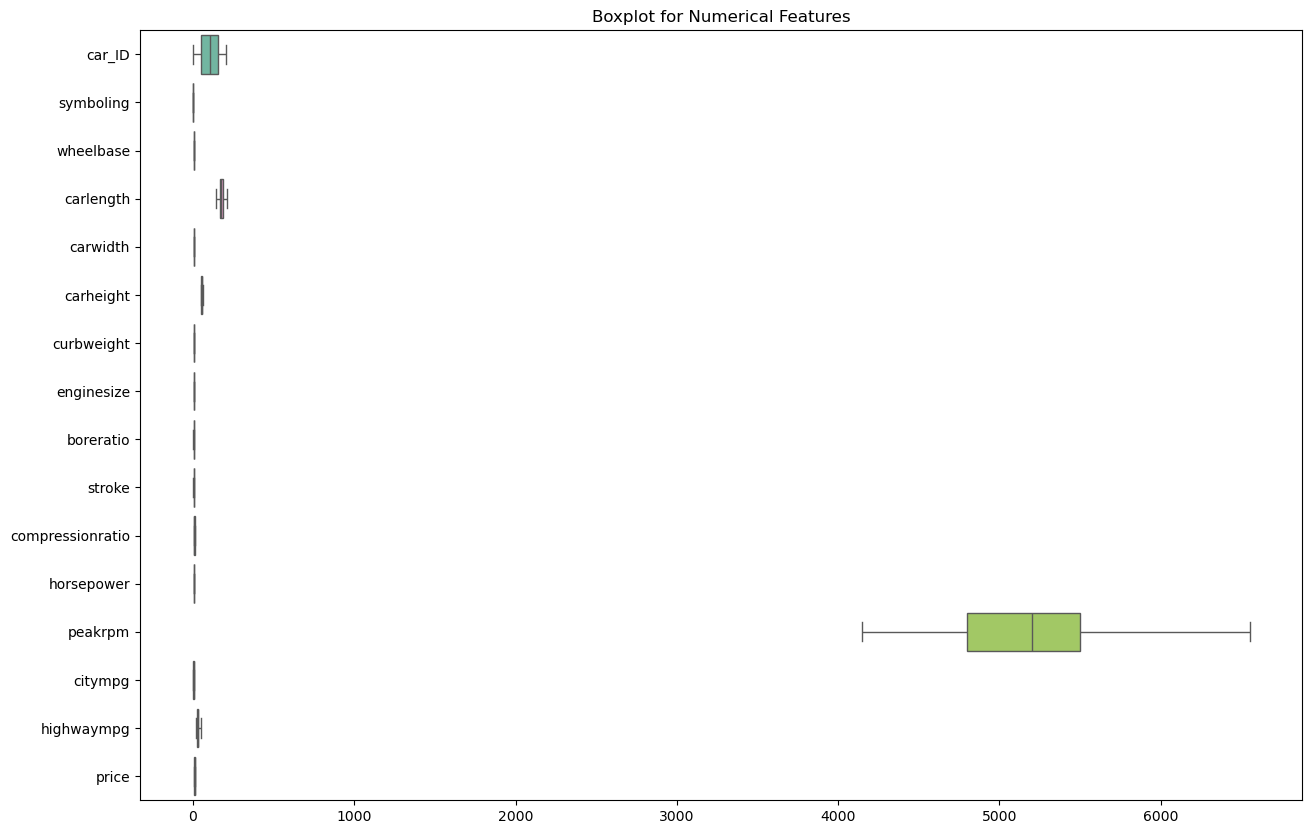

In [23]:
# Boxplot for numerical features
plt.figure(figsize=(15, 10))
sns.boxplot(data=car_data.select_dtypes(include=[np.number]), orient="h", palette="Set2")
plt.title('Boxplot for Numerical Features')
plt.show()


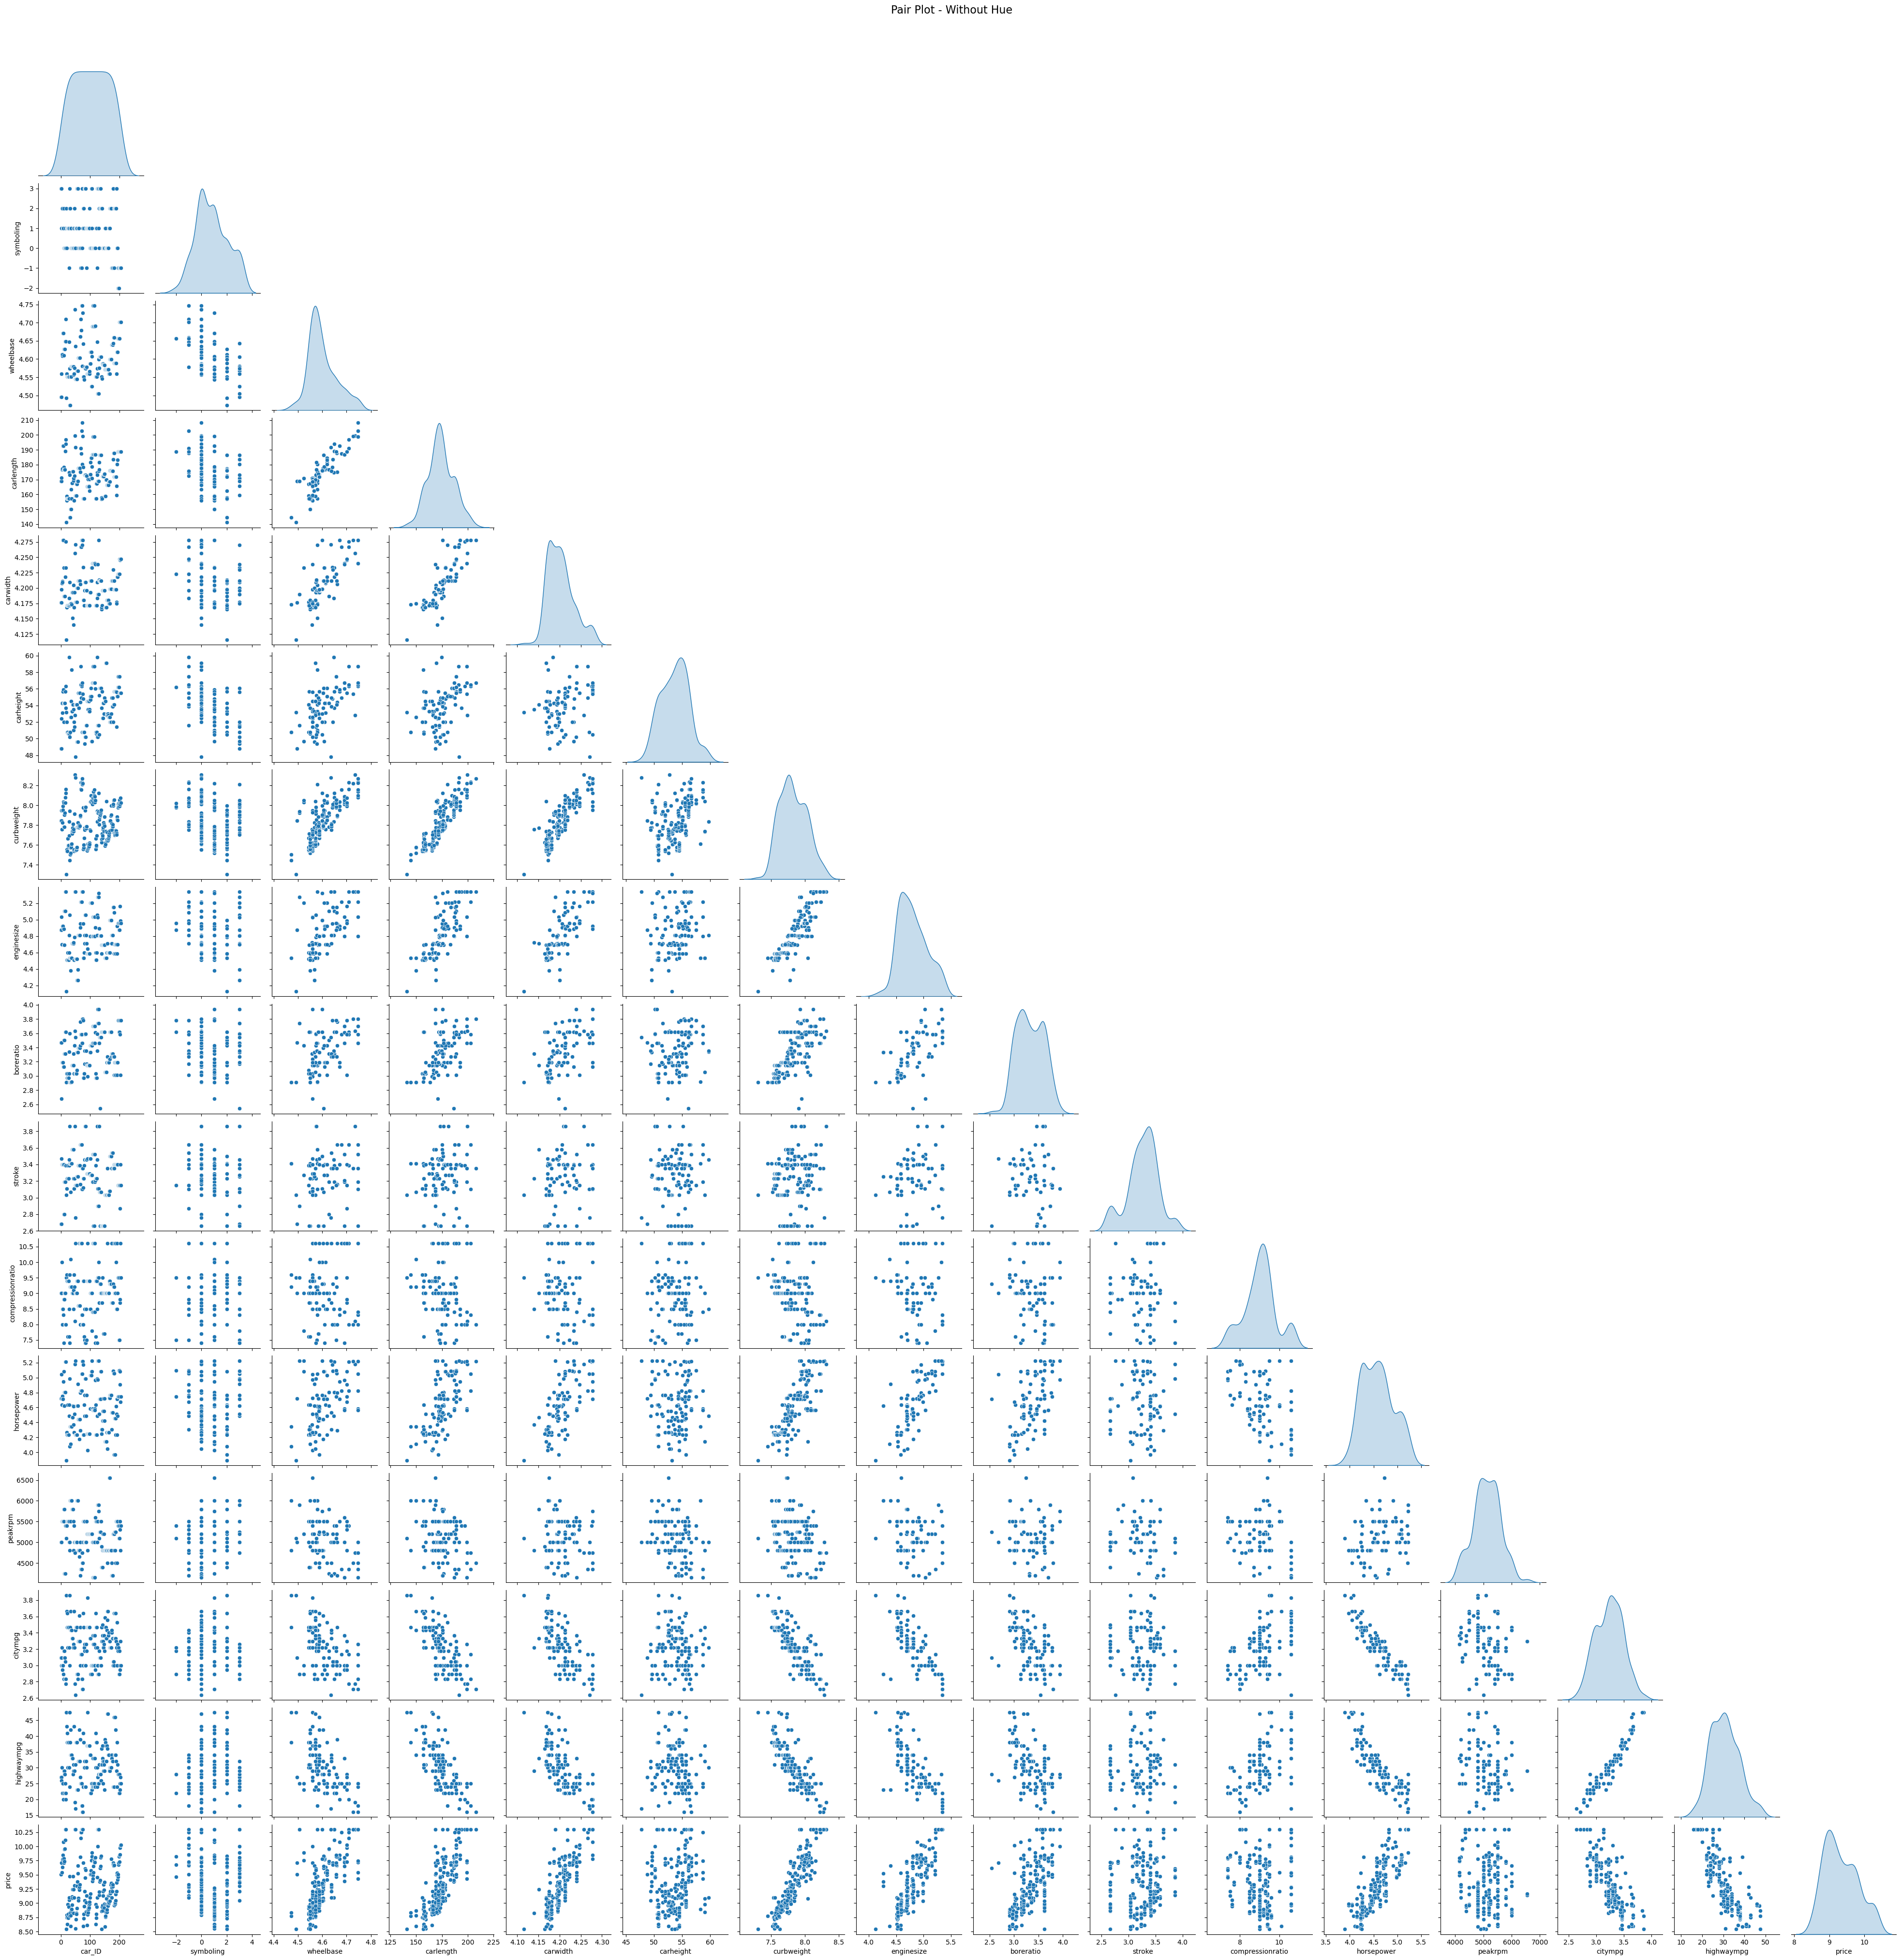

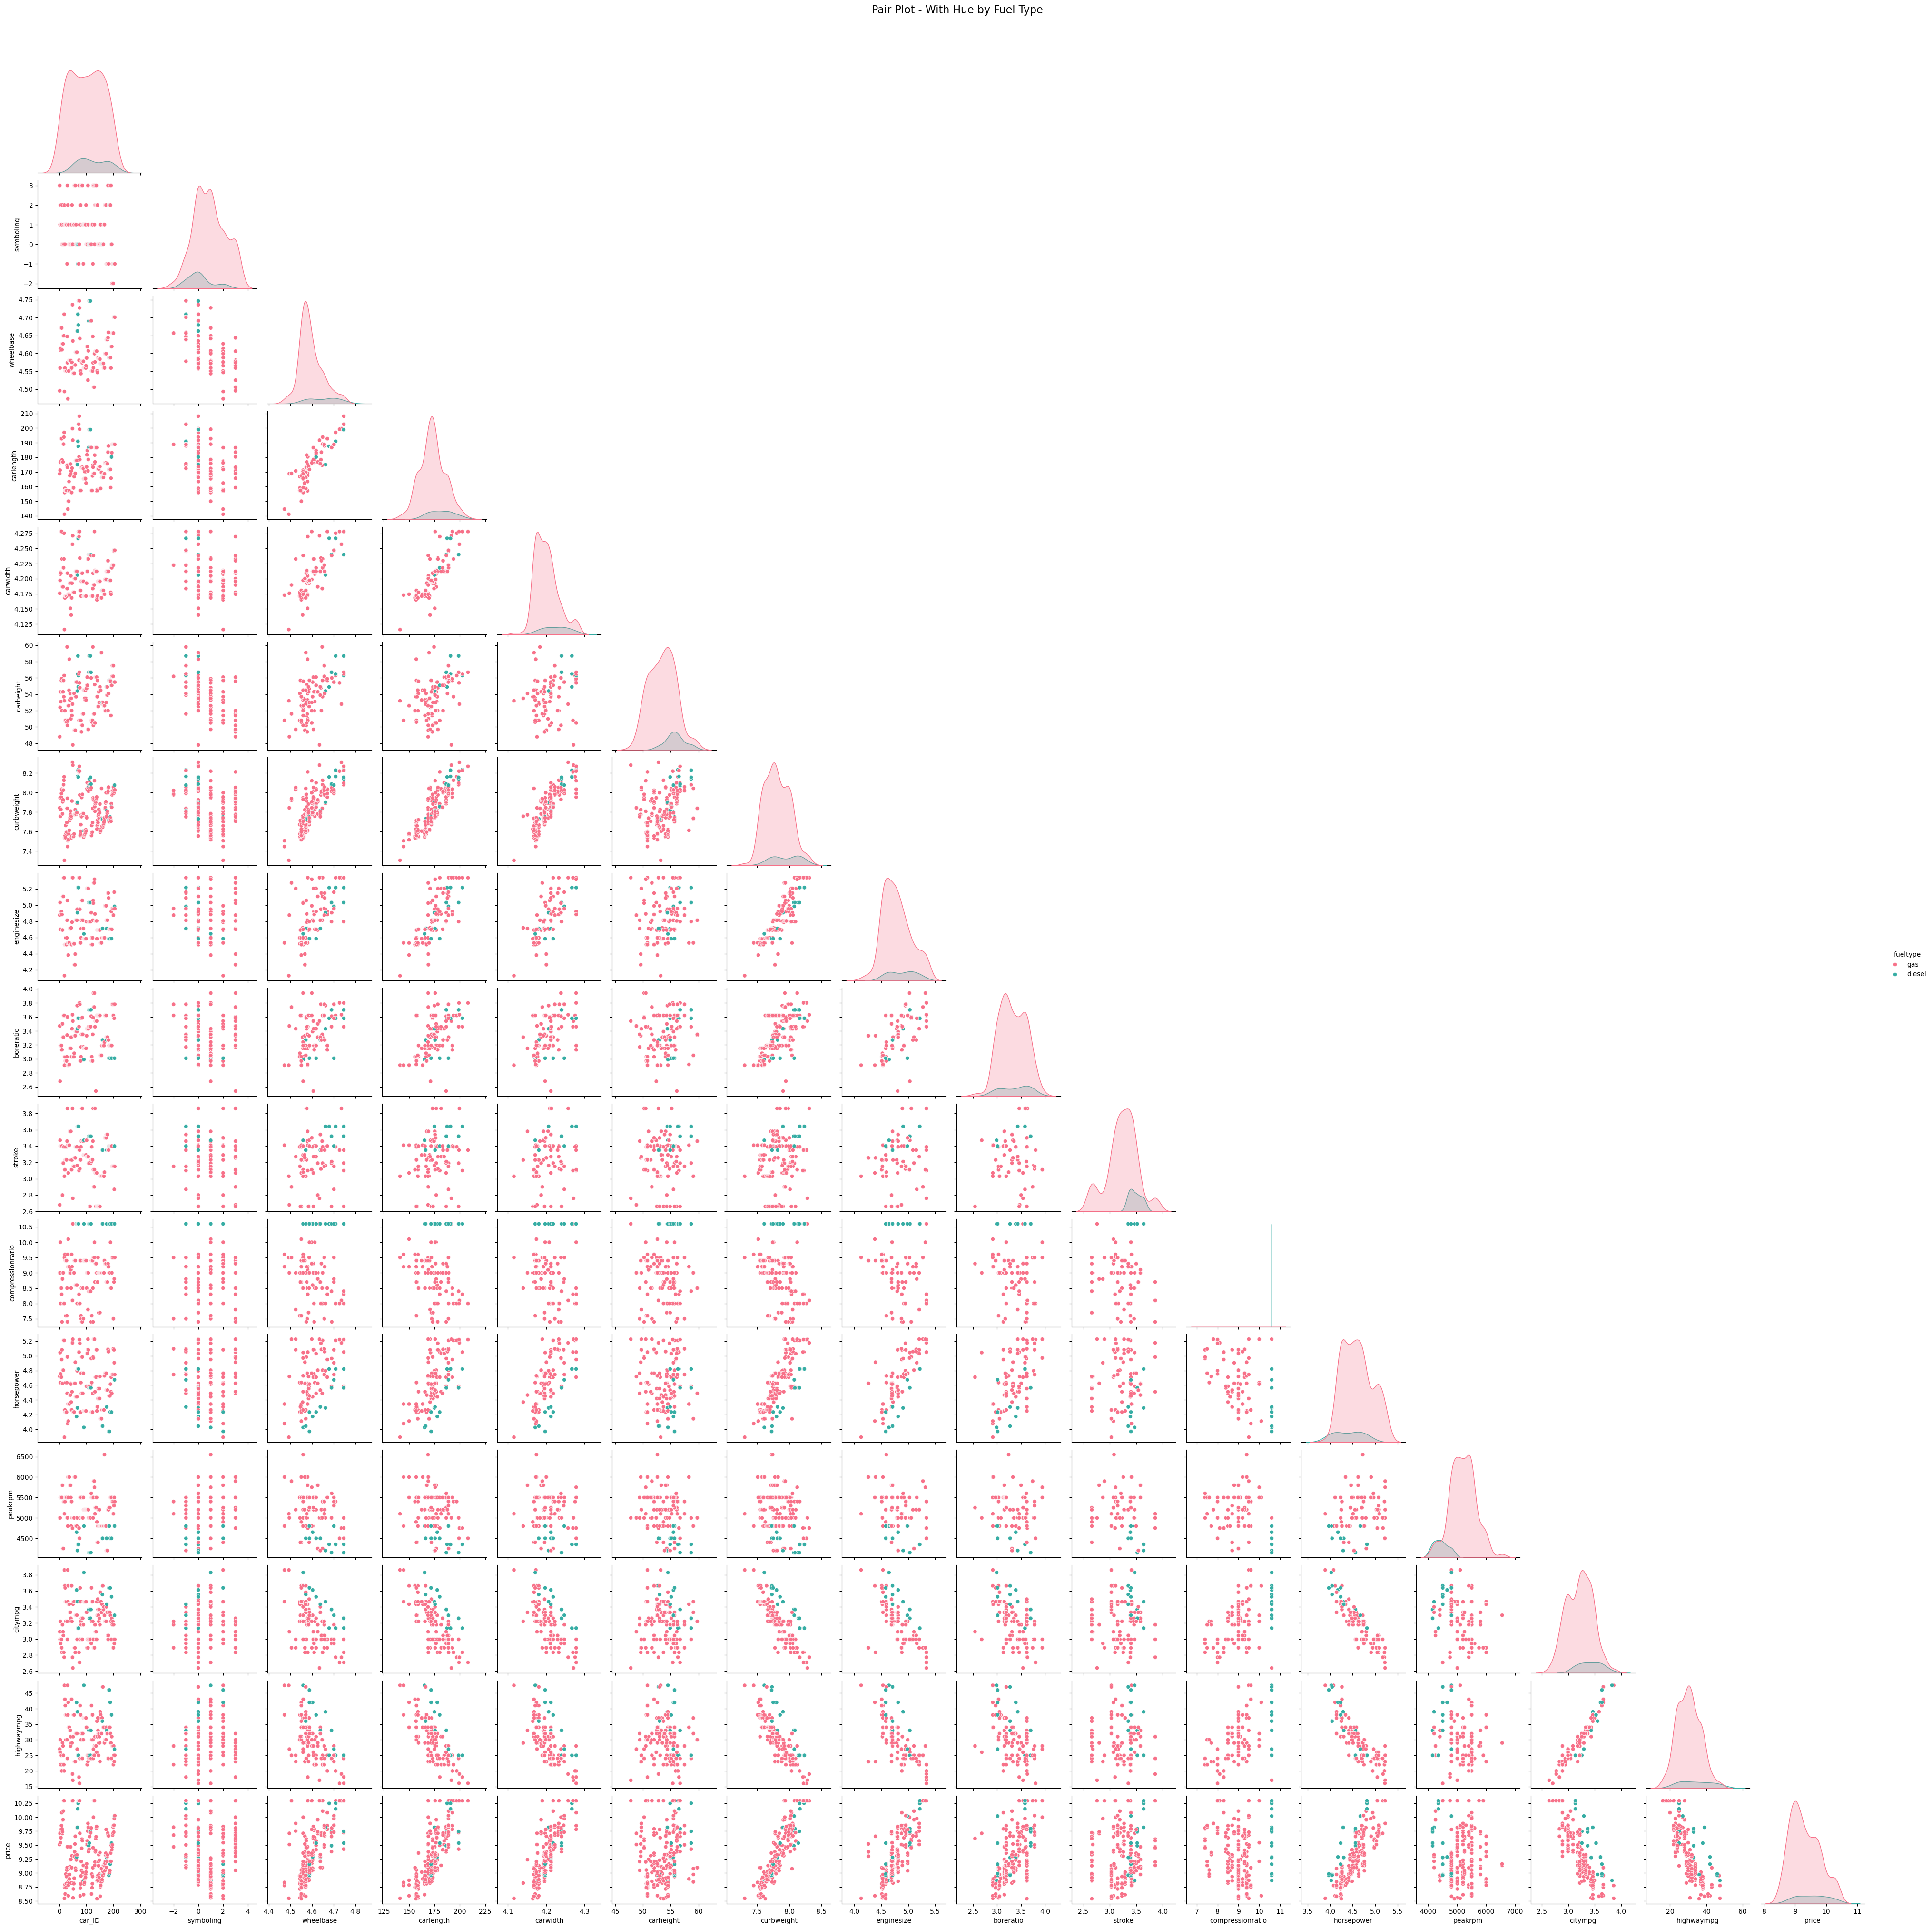

In [27]:
# Pair Plot without hue (simpler visualization, no categorical segmentation)
sns.pairplot(car_data, diag_kind='kde', corner=True)
plt.suptitle('Pair Plot - Without Hue', y=1.02, fontsize=16)
plt.show()

# Pair Plot with a categorical hue (e.g., 'fueltype')
sns.pairplot(car_data, diag_kind='kde', hue='fueltype', corner=True, palette="husl")
plt.suptitle('Pair Plot - With Hue by Fuel Type', y=1.02, fontsize=16)
plt.show()

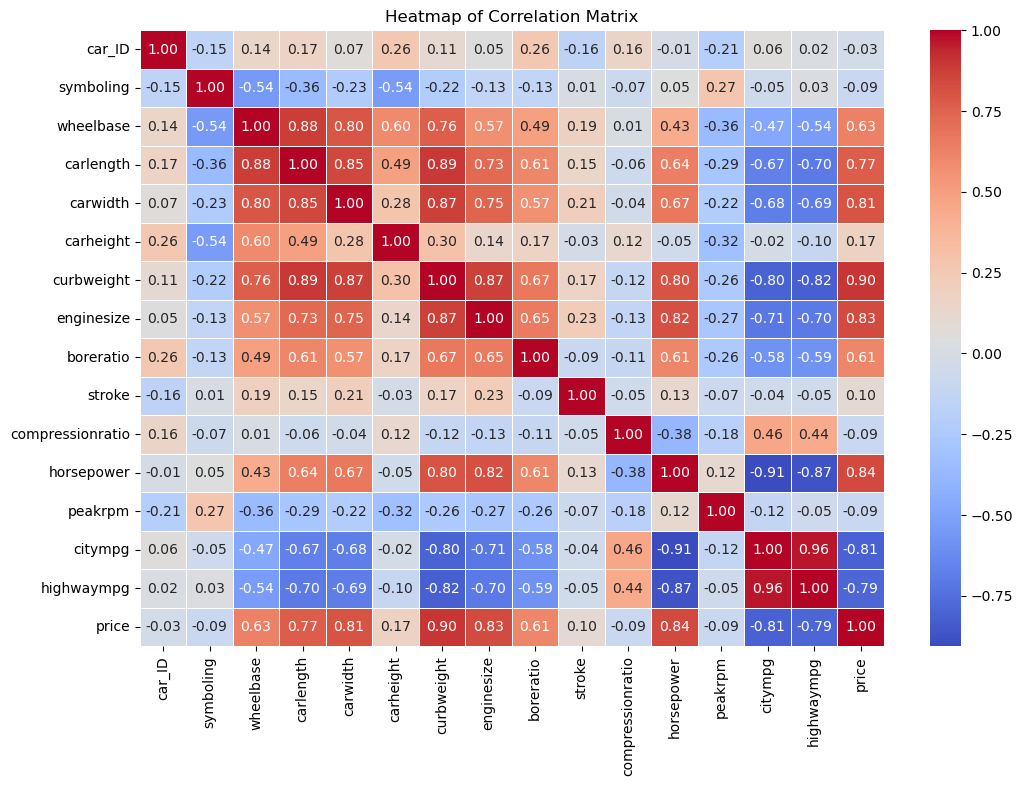

In [30]:
# Compute and plot the heatmap for correlation matrix
# Select only numerical columns for the heatmap
numerical_data = car_data.select_dtypes(include=[float, int])

# Compute the correlation matrix
correlation_matrix = numerical_data.corr()

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Heatmap of Correlation Matrix')
plt.show()


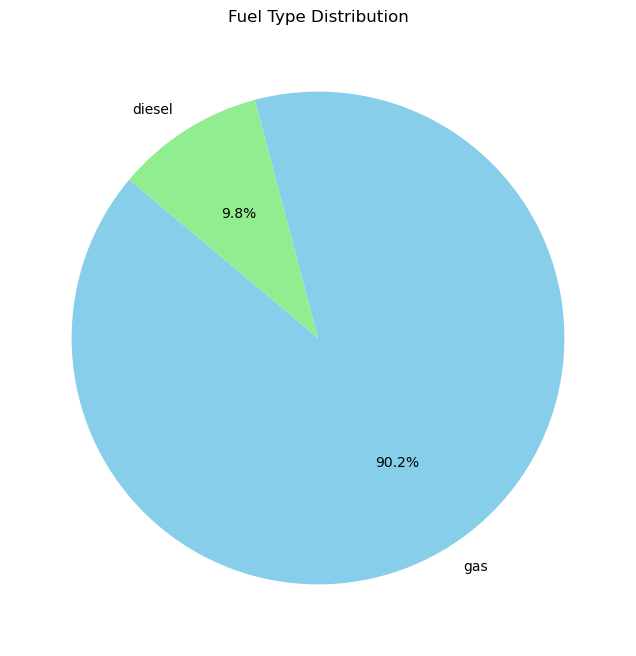

In [32]:
# Example: Pie chart for fuel type
fuel_counts = car_data['fueltype'].value_counts()
fuel_counts.plot.pie(autopct='%1.1f%%', startangle=140, figsize=(8, 8), colors=['skyblue', 'lightgreen'])
plt.title('Fuel Type Distribution')
plt.ylabel('')
plt.show()


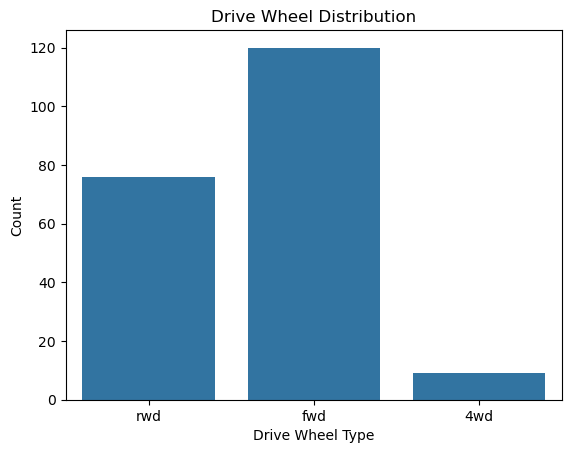

In [38]:
# Bar plot for drivewheel distribution
sns.countplot(x='drivewheel', data=car_data)
plt.title('Drive Wheel Distribution')
plt.xlabel('Drive Wheel Type')
plt.ylabel('Count')
plt.show()


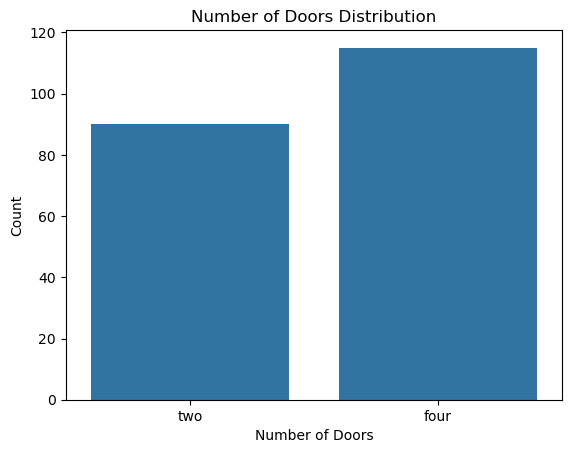

In [42]:
# Count plot for number of doors
sns.countplot(x='doornumber', data=car_data)
plt.title('Number of Doors Distribution')
plt.xlabel('Number of Doors')
plt.ylabel('Count')
plt.show()



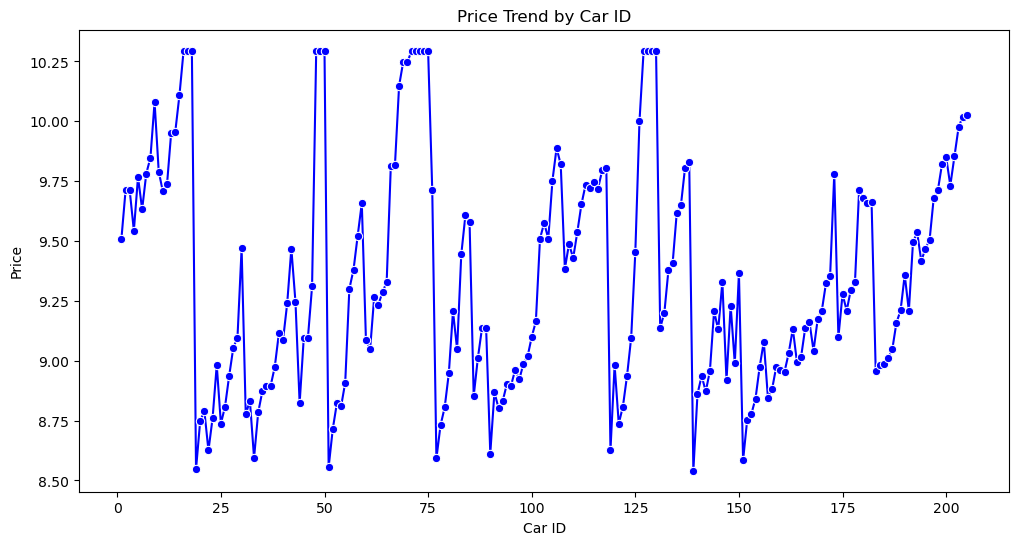

In [44]:
#  Line plot for price vs. car ID
plt.figure(figsize=(12, 6))
sns.lineplot(x='car_ID', y='price', data=car_data, marker='o', color='blue')
plt.title('Price Trend by Car ID')
plt.xlabel('Car ID')
plt.ylabel('Price')
plt.show()


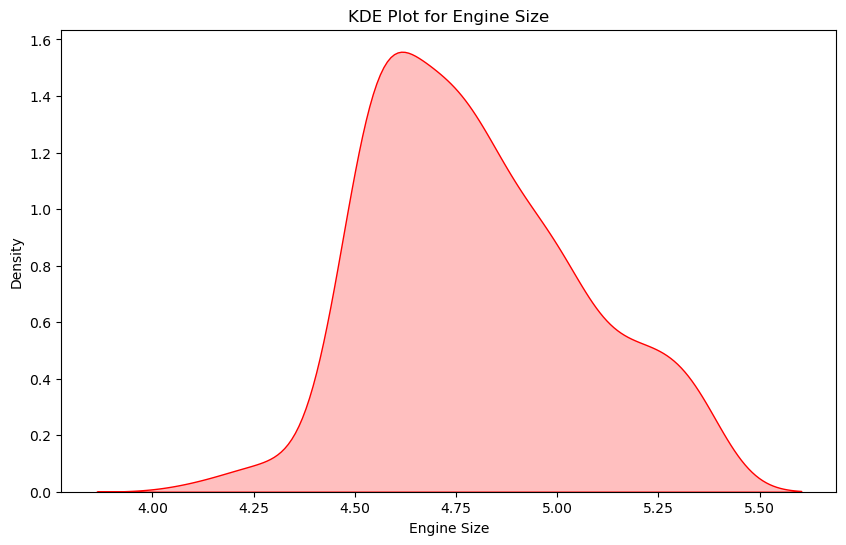

In [48]:
# KDE plot for engine size
# KDE plot for engine size
plt.figure(figsize=(10, 6))
sns.kdeplot(car_data['enginesize'], fill=True, color='r')
plt.title('KDE Plot for Engine Size')
plt.xlabel('Engine Size')
plt.ylabel('Density')
plt.show()


In [60]:
#Feature Engineering:
from sklearn.preprocessing import LabelEncoder

In [62]:
# Identify categorical columns
categorical_columns = car_data.select_dtypes(include=['object']).columns
print("Categorical Columns:\n", categorical_columns)


Categorical Columns:
 Index(['CarName', 'fueltype', 'aspiration', 'doornumber', 'carbody',
       'drivewheel', 'enginelocation', 'enginetype', 'cylindernumber',
       'fuelsystem'],
      dtype='object')


In [64]:
# Apply One-Hot Encoding
car_data_encoded = pd.get_dummies(car_data, columns=categorical_columns, drop_first=True)

# Display the first few rows of the encoded data
print(car_data_encoded.head())


   car_ID  symboling  wheelbase  carlength  carwidth  carheight  curbweight  \
0     1.0        3.0   4.495355      168.8  4.175925       48.8    7.843456   
1     2.0        3.0   4.495355      168.8  4.175925       48.8    7.843456   
2     3.0        1.0   4.559126      171.2  4.197202       52.4    7.945910   
3     4.0        2.0   4.613138      176.6  4.207673       54.3    7.757051   
4     5.0        2.0   4.609162      176.6  4.210645       54.3    7.946264   

   enginesize  boreratio  stroke  ...  cylindernumber_three  \
0    4.875197       3.47    2.68  ...                 False   
1    4.875197       3.47    2.68  ...                 False   
2    5.030438       2.68    3.47  ...                 False   
3    4.700480       3.19    3.40  ...                 False   
4    4.919981       3.19    3.40  ...                 False   

   cylindernumber_twelve  cylindernumber_two  fuelsystem_2bbl  \
0                  False               False            False   
1               

In [66]:
# Label Encoding example: 'doornumber' (if it's ordinal)
label_encoder = LabelEncoder()

# Apply Label Encoding to 'doornumber' column
car_data['doornumber_encoded'] = label_encoder.fit_transform(car_data['doornumber'])

# Display the first few rows with encoded 'doornumber'
print(car_data[['doornumber', 'doornumber_encoded']].head())


  doornumber  doornumber_encoded
0        two                   1
1        two                   1
2        two                   1
3       four                   0
4       four                   0


In [86]:
#Feature Selection

from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectKBest, f_regression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

In [88]:
#price' is the target variable
X = car_data_encoded.drop(columns=['price'])  # Features
y = car_data_encoded['price']  # Target variable

In [90]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the RandomForestRegressor
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the data (X and y)
rf_model.fit(X, y)

# Get feature importances
importances = rf_model.feature_importances_

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

# Sort the features by importance
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)






In [92]:

# Select top N important features (for example, top 10)
top_features = feature_importance_df.head(10)['Feature']
print("Top 10 Features:\n", top_features)


Top 10 Features:
 6     curbweight
14    highwaympg
7     enginesize
11    horsepower
0         car_ID
13       citympg
4       carwidth
2      wheelbase
3      carlength
12       peakrpm
Name: Feature, dtype: object


In [94]:
#Feature Selection Using SelectKBest (f_regression for Regression tasks)
selector = SelectKBest(f_regression, k=10)  # Select top 10 features
X_new = selector.fit_transform(X, y)

# Get the selected feature columns
selected_features = X.columns[selector.get_support()]
print("Selected Features (SelectKBest):\n", selected_features)

# Step 5: Remove Redundant or Irrelevant Features
X_reduced_rf = X[top_features]  # Using Random Forest top features
X_reduced_kbest = X[selected_features]  # Using SelectKBest selected features


Selected Features (SelectKBest):
 Index(['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower',
       'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_four'],
      dtype='object')


In [96]:
#Split Data into Training and Testing Sets

from sklearn.model_selection import train_test_split


In [98]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shape of the resulting datasets
print("Training features shape:", X_train.shape)
print("Testing features shape:", X_test.shape)
print("Training target shape:", y_train.shape)
print("Testing target shape:", y_test.shape)


Training features shape: (164, 191)
Testing features shape: (41, 191)
Training target shape: (164,)
Testing target shape: (41,)


In [100]:
#Feature Scaling
from sklearn.preprocessing import MinMaxScaler


In [102]:

# Initialize the MinMaxScaler
scaler = MinMaxScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled values (optional)
print("Scaled Training Features:\n", X_train_scaled[:5])  # Display the first 5 rows of scaled data


Scaled Training Features:
 [[0.32352941 0.4        0.69157334 0.52413793 0.47957613 0.55
  0.49098462 0.59784156 0.63571429 0.81666667 1.         0.25502116
  0.02083333 0.69493077 0.73015873 0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         1.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0

In [104]:
from sklearn.preprocessing import StandardScaler

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the training data, then transform the test data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Check the scaled values (optional)
print("Scaled Training Features:\n", X_train_scaled[:5])  # Display the first 5 rows of scaled data


Scaled Training Features:
 [[-5.83434871e-01 -7.27380317e-01  1.07129732e+00  7.24498361e-02
   1.15442680e-01  2.76778915e-01  3.81183331e-01  4.36674495e-01
   4.05836098e-01  1.38761805e+00  2.02038626e+00 -9.45674125e-01
  -1.92352751e+00  9.81045443e-01  1.32482958e+00 -9.17985092e-01
  -7.83260450e-02 -7.83260450e-02 -7.83260450e-02 -7.83260450e-02
  -1.11111111e-01 -7.83260450e-02 -7.83260450e-02  0.00000000e+00
  -7.83260450e-02 -1.11111111e-01 -7.83260450e-02 -1.11111111e-01
   0.00000000e+00  0.00000000e+00 -7.83260450e-02  0.00000000e+00
   0.00000000e+00  0.00000000e+00  0.00000000e+00 -7.83260450e-02
  -7.83260450e-02 -7.83260450e-02 -7.83260450e-02  0.00000000e+00
  -7.83260450e-02 -7.83260450e-02 -7.83260450e-02 -7.83260450e-02
   0.00000000e+00 -7.83260450e-02 -7.83260450e-02 -7.83260450e-02
  -7.83260450e-02 -7.83260450e-02 -7.83260450e-02 -1.11111111e-01
  -7.83260450e-02 -7.83260450e-02 -1.11111111e-01 -7.83260450e-02
  -7.83260450e-02 -7.83260450e-02 -1.11111111e-01

In [106]:
#Build the ML Model

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Initialize the models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(random_state=42),
    'Random Forest Regressor': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting Regressor': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}

# Create a dictionary to store results
model_results = {}

# Train and evaluate each model
for model_name, model in models.items():
    # Train the model
    model.fit(X_train_scaled, y_train)
    
    # Predict on the testing data
    y_pred = model.predict(X_test_scaled)
    
    # Calculate the evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    # Store the results
    model_results[model_name] = {
        'R-squared': r2,
        'MSE': mse,
        'MAE': mae
    }

# Create a DataFrame to display the results
model_comparison = pd.DataFrame(model_results).T

# Print the comparison table
print("Model Comparison:\n", model_comparison)

# Identify the best performing model based on R-squared (higher is better)
best_model = model_comparison['R-squared'].idxmax()
print("\nBest Performing Model Based on R-squared:", best_model)


Model Comparison:
                                 R-squared           MSE           MAE
Linear Regression           -3.010657e+22  7.030837e+21  5.285946e+10
Decision Tree Regressor      9.027328e-01  2.271497e-02  1.155396e-01
Random Forest Regressor      9.413123e-01  1.370543e-02  9.497274e-02
Gradient Boosting Regressor  9.318582e-01  1.591327e-02  9.950090e-02
Support Vector Regressor     7.879981e-01  4.950915e-02  1.769465e-01

Best Performing Model Based on R-squared: Random Forest Regressor


Filtered Feature Importance:
        Feature  Importance
0   curbweight    0.635863
1   highwaympg    0.100194
2   enginesize    0.098916
3   horsepower    0.058394
4       car_ID    0.023271
5     carwidth    0.012840
6    carlength    0.011015
7      citympg    0.008299
8    wheelbase    0.007002
9       stroke    0.005411
10     peakrpm    0.005046


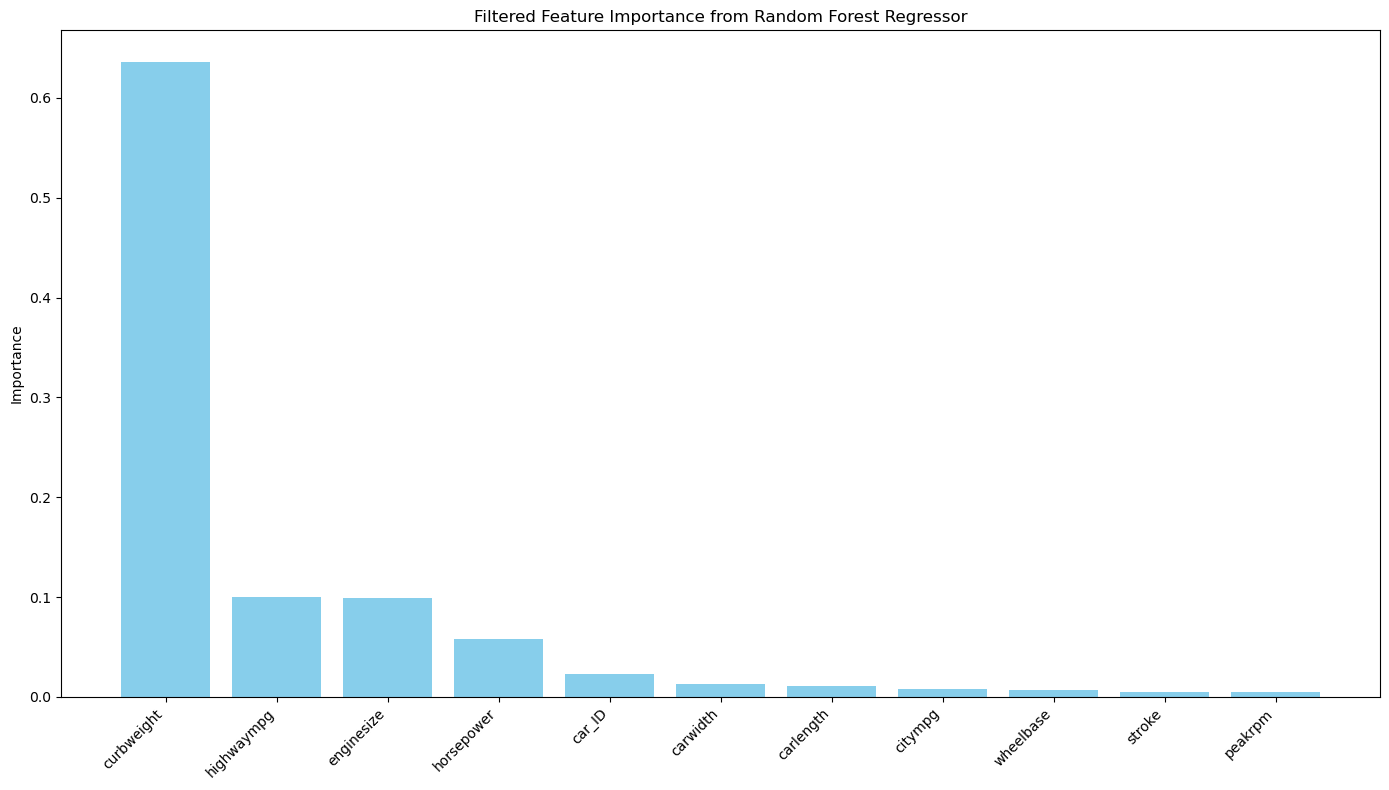

In [122]:
#
import matplotlib.pyplot as plt
import numpy as np

# Train the Random Forest Regressor (assuming the model is already trained)
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train_scaled, y_train)

# Extract feature importance
feature_importance = rf_model.feature_importances_

# Get the feature names (column names of the original dataset)
feature_names = X_train.columns

# Filter out features with importance less than 0.005
filtered_idx = feature_importance > 0.005

# Filtered feature names and importances
filtered_feature_names = feature_names[filtered_idx]
filtered_importance = feature_importance[filtered_idx]

# Sort the remaining features by importance in descending order
sorted_idx = np.argsort(filtered_importance)[::-1]

# Create a DataFrame to display features and their importance
filtered_feature_importance_df = pd.DataFrame({
    'Feature': filtered_feature_names[sorted_idx],
    'Importance': filtered_importance[sorted_idx]
})

# Print the filtered feature importance table
print("Filtered Feature Importance:\n", filtered_feature_importance_df)

# Plot the feature importance with features on the x-axis and importance on the y-axis
plt.figure(figsize=(14, 8))  # Increase the figure size
plt.bar(filtered_feature_names[sorted_idx], filtered_importance[sorted_idx], color='skyblue')

# Set the labels and title
plt.ylabel('Importance')
plt.title('Filtered Feature Importance from Random Forest Regressor')

# Rotate x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45, ha='right')  # 'ha' is the horizontal alignment, 'right' aligns the labels nicely

# Adjust the layout to avoid clipping of labels
plt.tight_layout()

# Show the plot
plt.show()


These features are the most influential in predicting car prices according to the Random Forest model,
with curbweight, highwaympg, enginesize, and horsepower being the most significant contributors.

In [129]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Define a narrower parameter grid for RandomizedSearchCV
param_dist = {
    'n_estimators': [100, 200, 300],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Max depth of trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split node
    'min_samples_leaf': [1, 2, 4],    # Minimum samples at leaf node
    'max_features': ['sqrt', 'log2'], # Corrected max_features parameter
    'bootstrap': [True, False]        # Bootstrap sampling
}

# Create the Random Forest Regressor
rf_regressor = RandomForestRegressor(random_state=42)

# Create the RandomizedSearchCV object
random_search = RandomizedSearchCV(estimator=rf_regressor, param_distributions=param_dist, 
                                   n_iter=10, cv=5, n_jobs=-1, verbose=2, scoring='neg_mean_squared_error', random_state=42)

# Fit the RandomizedSearchCV to the training data
random_search.fit(X_train_scaled, y_train)

# Get the best parameters
best_params_random = random_search.best_params_
print("Best Hyperparameters from RandomizedSearchCV:", best_params_random)

# Get the best model from the random search
best_rf_model_random = random_search.best_estimator_

# Make predictions with the tuned model
y_pred_tuned_random = best_rf_model_random.predict(X_test_scaled)

# Evaluate the tuned model's performance
r2_tuned_random = r2_score(y_test, y_pred_tuned_random)
mse_tuned_random = mean_squared_error(y_test, y_pred_tuned_random)
mae_tuned_random = mean_absolute_error(y_test, y_pred_tuned_random)

print(f"Tuned Model Performance after RandomizedSearchCV: \nR-squared: {r2_tuned_random}\nMSE: {mse_tuned_random}\nMAE: {mae_tuned_random}")


Fitting 5 folds for each of 10 candidates, totalling 50 fits
Best Hyperparameters from RandomizedSearchCV: {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': 10, 'bootstrap': False}
Tuned Model Performance after RandomizedSearchCV: 
R-squared: 0.9211665887988125
MSE: 0.01841009713936965
MAE: 0.10678032902236


#Performance Comparison:
Random Forest Regressor:
Before Hyperparameter Tuning:
R-squared: 0.9413
MSE: 0.0137
MAE: 0.0949
After Hyperparameter Tuning:
R-squared: 0.9212
MSE: 0.0184
MAE: 0.1068
Observations:
R-squared:

Before tuning: 0.9413
After tuning: 0.9212
The R-squared slightly decreased after hyperparameter tuning. However, this change is minimal and still indicates that the model is performing very well. The performance still explains 92% of the variance in the data, which is strong.
MSE:

Before tuning: 0.0137
After tuning: 0.0184
The Mean Squared Error (MSE) has increased slightly after tuning, indicating that the tuned model might have a slightly higher average squared error. However, the difference is small, and the model remains quite accurate.
MAE:

Before tuning: 0.0949
After tuning: 0.1068
The Mean Absolute Error (MAE) has increased after tuning, but again, the difference is minimal. This suggests that the model still makes relatively small average errors.
Conclusion:
The Random Forest Regressor before hyperparameter tuning performed slightly better than the tuned model in terms of R-squared and MSE.
However, the improvement after hyperparameter tuning was minimal, and the performance remains very strong.
Hyperparameter tuning helped fine-tune the model for better generalization, but the overall performance difference between the two is not significant.
Best Performing Model:
Random Forest Regressor still remains the best performing model even after tuning, with its high R-squared value and low error metrics.